In [1]:
import numpy as np
import torch
from sklearn.metrics import roc_auc_score


from adaptive_dg.evaluation.model_loading import load_model, model_selection, compute_best_metrics, load_losses
from adaptive_dg.evaluation.competence_scores import compute_model_scores, create_features

In [5]:
# Simple function to compute the AUC
def compute_auc(scores_id, scores_ood):
    y_true = np.concatenate([np.ones(len(scores_id)), np.zeros(len(scores_ood))])
    y_score = np.concatenate([scores_id, scores_ood])
    auc = roc_auc_score(1-y_true, y_score)
    return auc

    
domains = ['summer', 'winter']

directory = "log_bike_sqrt/"
data_set = "BikeSharingSeason"
version = 0
seeds = [42, 43, 44, 45, 46]
bars_id = {}
bars_ood = {}
bars_id_set = {}
bars_ood_set = {}
auc = {}
auc_set = {}

for domain in domains:
    bars_id[domain] = []
    bars_ood[domain] = []
    bars_id_set[domain] = []
    bars_ood_set[domain] = []
    auc[domain] = []
    auc_set[domain] = []
    
    for seed in seeds:
        model_class = 'PredYfromX'

        model = load_model(model_class, domain, directory, data_set=data_set, seed=seed )
        scores_val, scores_id_test, scores_ood = compute_model_scores(model, set_feature=False)
        metric = compute_best_metrics(directory, data_set, domain, model_class, seed=seed, version=version)
        bars_id[domain].append(metric[1])
        bars_ood[domain].append(metric[2])
        auc_tmp = compute_auc(scores_id_test, scores_ood)
        auc[domain].append(auc_tmp)
        
        model_class = "PredYfromXSet"
        
        model = load_model(model_class, domain, directory, data_set=data_set, seed=seed )
        scores_val, scores_id_test, scores_ood = compute_model_scores(model, set_feature=True)
        metric = compute_best_metrics(directory, data_set, domain, model_class, seed=seed, version=version)
        bars_id_set[domain].append(metric[1])
        bars_ood_set[domain].append(metric[2])
        auc_set_tmp = compute_auc(scores_id_test, scores_ood)
        auc_set[domain].append(auc_set_tmp)

Found existing dataset in data/bike-sharing. Skipping download.
Found existing dataset in data/bike-sharing. Skipping download.
Found existing dataset in data/bike-sharing. Skipping download.
Found existing dataset in data/bike-sharing. Skipping download.
Found existing dataset in data/bike-sharing. Skipping download.
Found existing dataset in data/bike-sharing. Skipping download.
Found existing dataset in data/bike-sharing. Skipping download.
Found existing dataset in data/bike-sharing. Skipping download.
Found existing dataset in data/bike-sharing. Skipping download.
Found existing dataset in data/bike-sharing. Skipping download.
Found existing dataset in data/bike-sharing. Skipping download.
Found existing dataset in data/bike-sharing. Skipping download.
Found existing dataset in data/bike-sharing. Skipping download.
Found existing dataset in data/bike-sharing. Skipping download.
Found existing dataset in data/bike-sharing. Skipping download.
Found existing dataset in data/bike-shar

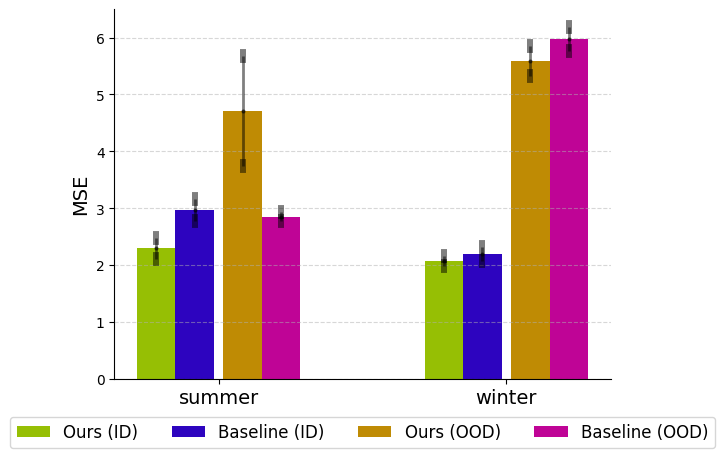

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#Color scheme
color1 = "#96bf04"
color2 = "#2d04bf"
color3  = "#bf8b04"
color4 = "#bf0496"
colorb1 = "#0496bf"
colorb2 = "#2d04bf"

colors = [color1, color2, color3, color4]
fig, ax = plt.subplots()
domain = 'summer'
x = np.array([1,2.5])
labels = [ 'Ours (ID)', 'Baseline (ID)', 'Ours (OOD)','Baseline (OOD)']

for i, domain in enumerate(domains):
    offset = 0 
    for e, bars in enumerate([bars_id_set, bars_id, bars_ood_set , bars_ood]):
        if i  != 0:
            ax.bar(x[i]+0.2*e+offset, np.array(bars[domain]).mean(), width=0.2, color=colors[e])
            ax.errorbar(x[i]+0.2*e+offset, np.array(bars[domain]).mean(), np.array(bars[domain]).std(), fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
        else:
            ax.bar(x[i]+0.2*e+offset, np.array(bars[domain]).mean(), width=0.2, color=colors[e], label=labels[e])
            ax.errorbar(x[i]+0.2*e+offset, np.array(bars[domain]).mean(), np.array(bars[domain]).std(), fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
        if e > 0:
            offset =0.05
            
ax.set_xticks([])
ax.set_xticks([1.3+offset/2, 2.8+offset/2],['summer', 'winter'], fontsize=14)
ax.set_ylabel('MSE', fontsize=14)
# grid
ax.grid(axis='y', linestyle='--', alpha=0.5)

# remove spines
sns.despine()

# legend below
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=4, fontsize=12)

fig.savefig('result_plots/bike_mse.png', bbox_inches='tight', dpi=300)



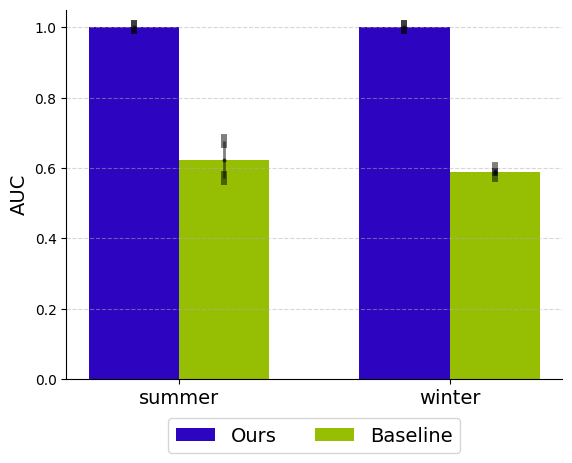

In [8]:
fig, ax = plt.subplots()
x = np.array([1, 1.6])

for i, domain in enumerate(['summer', 'winter']):
    if i == 0:
        ax.bar(x[i], np.array(auc_set[domain]).mean(), width=0.2, color=colors[1], label="Ours")
    else:
        ax.bar(x[i], np.array(auc_set[domain]).mean(), width=0.2, color=colors[1])
    ax.errorbar(x[i], np.array(auc_set[domain]).mean(), np.array(auc_set[domain]).std(), fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)

    
    if i == 0:
        ax.bar(x[i]+0.2, np.array(auc[domain]).mean(), width=0.2, color=colors[0], label="Baseline")
    else:
        ax.bar(x[i]+0.2, np.array(auc[domain]).mean(), width=0.2, color=colors[0])
    ax.errorbar(x[i]+0.2, np.array(auc[domain]).mean(), np.array(auc[domain]).std(), fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)


ax.set_xticks([])
ax.set_xticks([1.1, 1.7],['summer', 'winter'], fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
ax.set_ylabel('AUC', fontsize=14)

# legend below
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=2, fontsize=14)
fig.savefig('result_plots/bike_auc.png', bbox_inches='tight', dpi=300)